Lab 3 <br>
Max Wang


<h2>Problem 1 </h2>

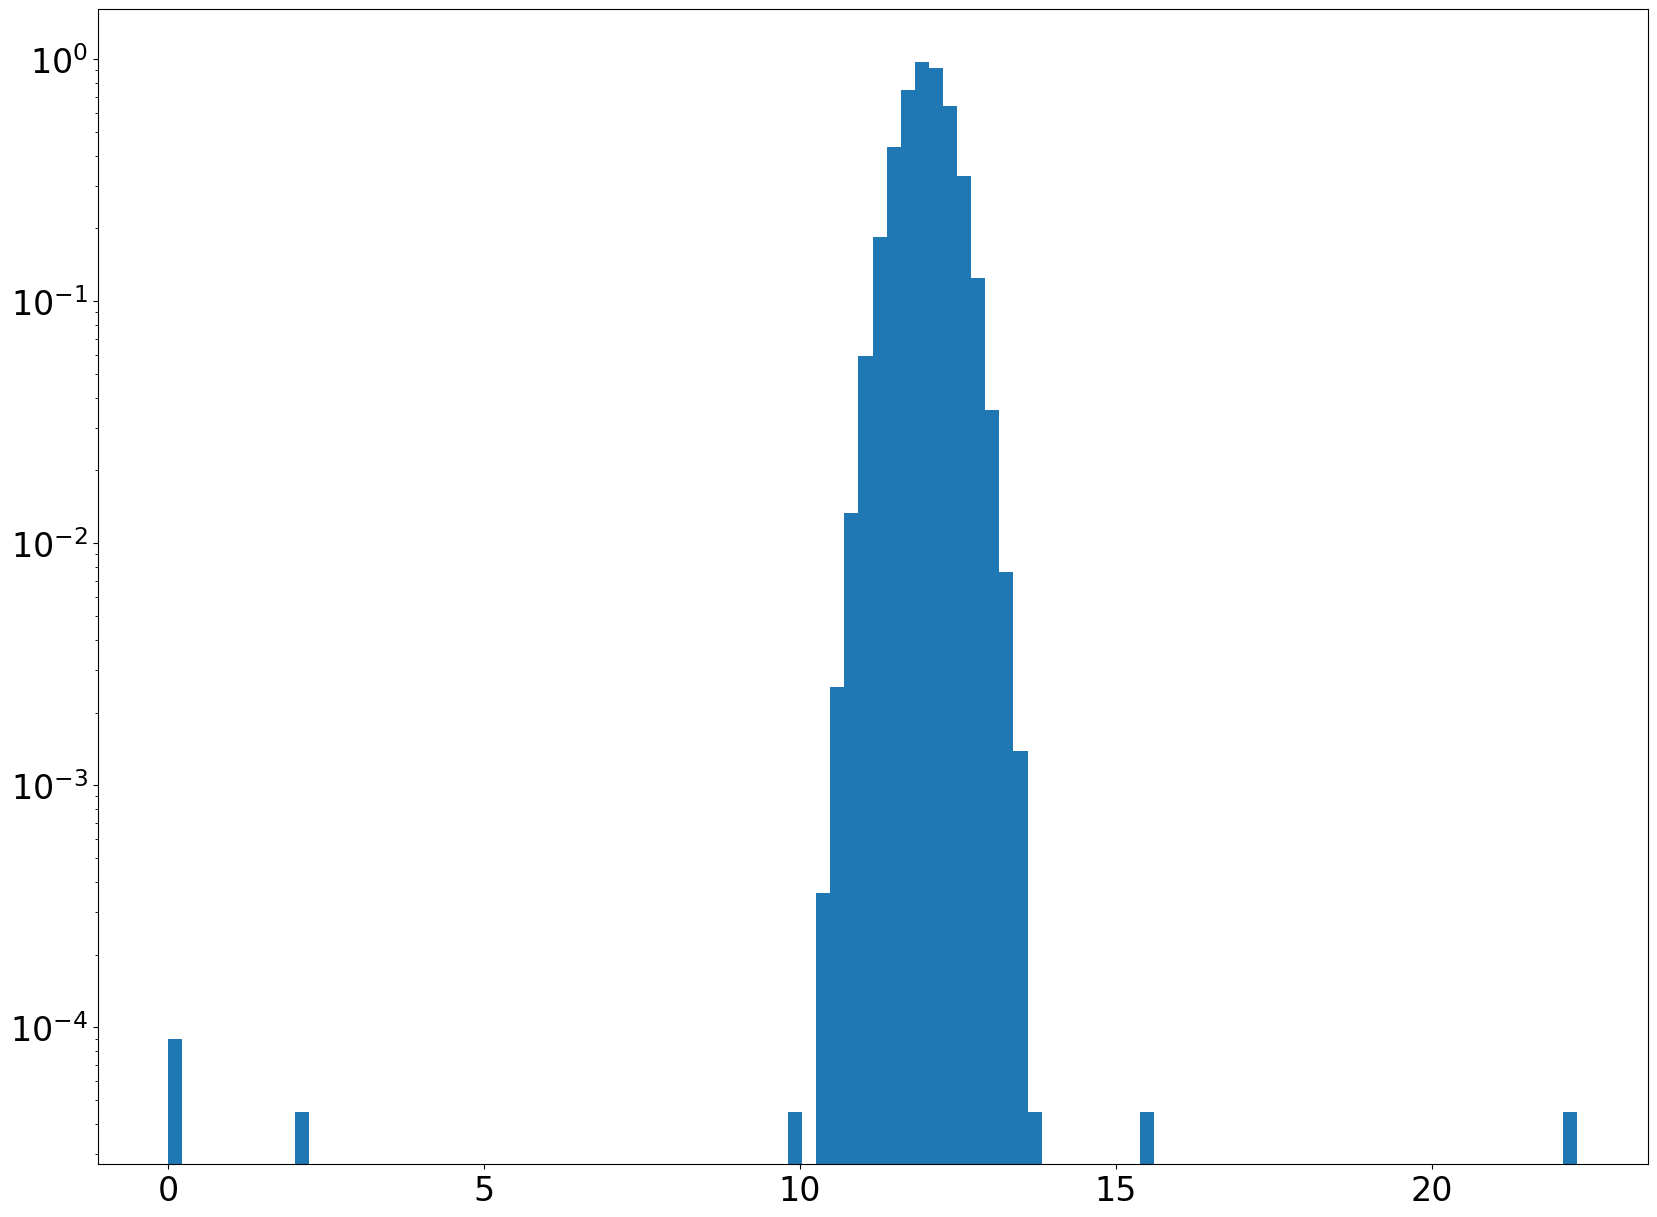

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

A1. <br>
In this plot the distribiution has the mean of 12 Kelvins, with most of the numbers ranging from 10 to 14 Kelvins,<br>
and there are a few outliers ranging from 0 to 22. 

A2.Statistical Question <br>
If the thermal control system and experiment equipments are working as intended, we expect the temperature distribution to be a <br>
normal distribution with a mean of 12 Kelvins, and with the standard deviation range of 0.4K. What is the probability of observing <br>
signals from 14 Kelvins to infinity and from 0 to 10 Kelvins?


A3. Mathematical Equation <br>
$P = \int_{0}^{14} pdf(x)dx + \int_{14}^\infty pdf(x)dx$


A4.  Truth Table

| | True T | Bad T |
| ----------- | ----------- | ----------- |
| Test Good | 100000 | 2 | 
| Test Bad |0 | 6 |

B. <br>
Since we choose the threshhold to be from 10 to 14 Kelvins, the bad data that we throw out are generally <br>
out of that range of data, with datas closer to 0 and greater than 20 being thrown out. It is a predictable <br>
quantity as the true data is a gaussian distribution.

C. <br>
There are two data points, 10.3 and 12.4 that got labeled into the good data set, but because the threshhold <br>
is defined to be from 10 to 14, it is not possible to avoid these data.

<h2>Problem 2 </h2>

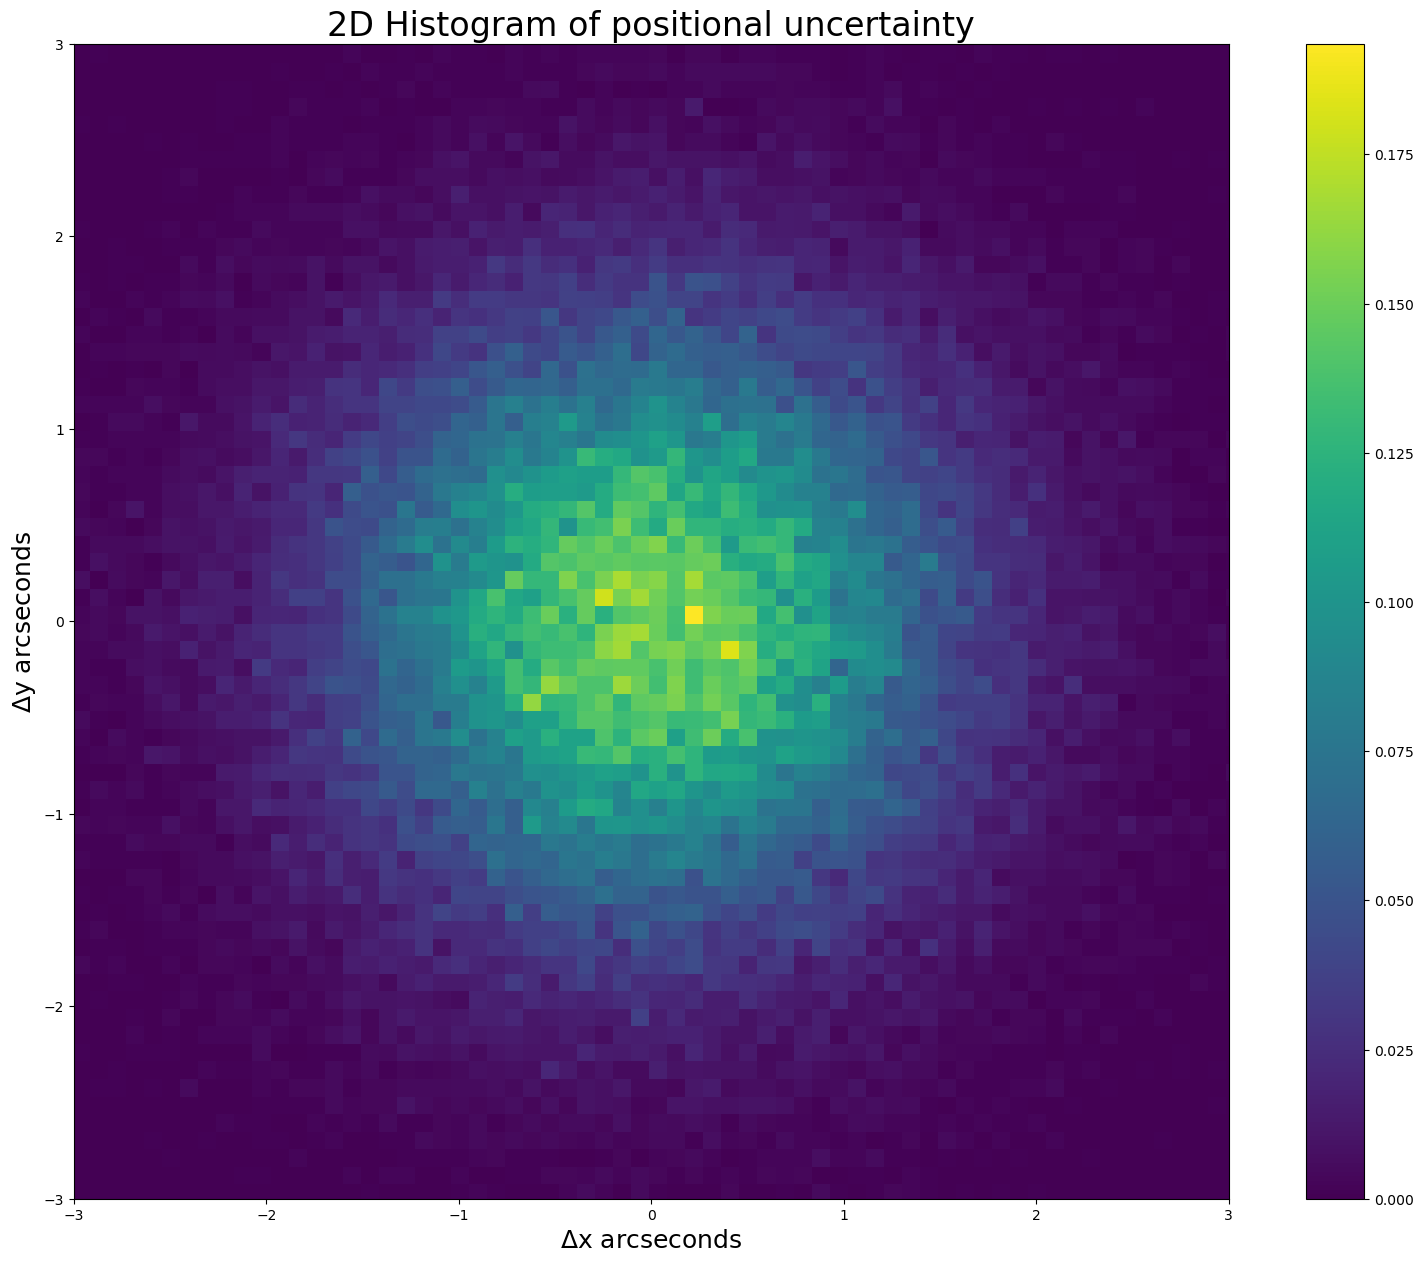

In [2]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

2a. Statistical Question <br>
Given an observation from an asteroid, we expect the distribution of the movement of the star signals to be a Gaussian Distribution <br>
with a RMS of 1 arcsecond. How far does the signal have to move to produce a 5 $\sigma$ detection from the center of the distribution?



2b. Mathematical Equation <br>
sum of two distribution is a Rayleigh distribution, it will be the pdf of a Rayleigh distribution <br>
$P(5 sigma) =  \int_{n}^{\infty} pdf(x, sigma)dx $


2c. Distance in arcseconds

In [3]:
prob = stats.norm.cdf(5)
stats.rayleigh.ppf(prob)

5.489079776034238

It will be 5.49 arcseconds.

<h2>Problem 3 </h2>

3a. Statistical Question <br>
If we observe for 8 hours a day, for 15 days, the average mean of the cosmic rays would be 7200. <br>
Given the observation period is 7200 minutes , what is the probability of observing the total detected<br>
signal to be 6800 cosmic rays ?

3b. Mathetical Equation <br>
$P =  \int_{6800}^{\infty} pdf(x, 7200)dx $

3c. Conversion to Sigma <br>


In [7]:
prob = stats.poisson.cdf(6800,7200)
sigma = stats.norm.ppf(prob)
sigma

-4.750747965777188

The sigma would be 4.75, which is less than 5 sigma, meaning it is not statistically enough to claim <br>
the discovery of an abnormal star.